# 主成分分析
## 算法原理

- 主成分分析（PCA）是一种无监督学习方法，旨在通过线性变换将原始的高维数据映射到一个低维空间，同时尽可能保留数据的方差（即信息量）。简单来说，PCA 的目标是找到一组新的坐标轴（称为主成分），这些坐标轴能够捕捉数据中最大的变异性，并用更少的维度来近似表示原始数据。
- 关键名词：

1. 维度：就是数据的“特征数量”。比如，房子的面积、房间数是 2 个维度，加个价格就变成 3 维。
2. 降维：把维度变少。比如，原来有 10 个特征，降维后只剩 2 个。
3. 主成分：PCA 找到的“新坐标轴”。这些新坐标轴是原来特征的某种组合，能抓住数据里最大的变化。
4. 方差：数据的“散乱程度”。方差越大，说明数据点越分散，越能体现差异。
5. 协方差矩阵：用来描述不同特征之间关系的矩阵。它告诉我们一个特征变动时，另一个特征会怎么变。
## 算法步骤
- PCA 的步骤：
    1. 数据标准化：将数据进行标准化处理，使每个特征的均值为 0，方差为 1。这一步是为了消除不同特征量纲的影响。
    2. 计算协方差矩阵：计算标准化后数据的协方差矩阵，以了解各特征之间的关系。
    3. 特征值分解：对协方差矩阵进行特征值分解，得到特征值和对应的特征向量。特征向量表示新的坐标轴方向，特征值表示这些方向上的方差大小。
    4. 选择主成分：根据特征值的大小，选择前 k 个最大的特征值对应的特征向量作为主成分。k 的选择通常基于累计方差贡献率。
    5. 投影到新空间：将原始数据投影到选定的主成分上，得到降维后的数据表示。

## 几个问题
1. 为什么要计算协方差矩阵？
    - 协方差矩阵帮助我们理解不同特征之间的关系。通过分析协方差矩阵，我们可以发现哪些特征是相关的，从而选择那些能够最大程度上保留数据变异性的主成分。
    - 定义：对于两个随机变量 X 和 Y，协方差定义为 $$ Cov(X, Y) = E[(X - E[X])(Y - E[Y])] $$.协方差矩阵是一个方阵，其中第 i 行第 j 列的元素表示第 i 个特征和第 j 个特征之间的协方差。
    - 作用：协方差矩阵的对角线元素表示各个特征的方差，非对角线元素表示不同特征之间的协方差。通过分析协方差矩阵，我们可以识别出哪些特征是相关的，从而选择那些能够最大程度上保留数据变异性的主成分。
2. 为什么要进行特征值分解？
    - 特征值分解帮助我们找到协方差矩阵的特征向量和特征值。特征向量表示新的坐标轴方向，特征值表示这些方向上的方差大小。通过选择最大的特征值对应的特征向量，我们可以找到那些能够最大程度上保留数据变异性的主成分。
    - 定义：对于一个方阵 A，如果存在一个非零向量 v 和一个标量 λ，使得 $$ Av = \lambda v $$，则称 λ 为 A 的特征值，v 为对应的特征向量。
    - 作用：通过对协方差矩阵进行特征值分解，我们可以得到一组正交的特征向量，这些特征向量构成了新的坐标系。选择最大的特征值对应的特征向量作为主成分，可以确保我们在降维过程中尽可能保留数据的方差信息。
    - 目的：通过特征值分解，我们可以识别出数据中最重要的方向（主成分），从而实现有效的降维。

## 主成分分析的使用场景

- 数据可视化：PCA 可以将高维数据降维到 2D 或 3D，便于可视化和理解数据结构。
- 噪声过滤：通过保留主要成分，PCA 可以帮助去除数据中的噪声，提高模型的性能。
- 特征提取：PCA 可以用于从原始特征中提取出更有代表性的特征，减少冗余信息。


In [105]:
# 导入依赖包
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# 1。 导入数据
data = pd.read_csv('../../../datasets/鳄梨价格/avocado-updated-2020.csv')
print(data.head())

         date  average_price  ...  year             geography
0  2015-01-04           1.22  ...  2015                Albany
1  2015-01-04           1.79  ...  2015                Albany
2  2015-01-04           1.00  ...  2015               Atlanta
3  2015-01-04           1.76  ...  2015               Atlanta
4  2015-01-04           1.08  ...  2015  Baltimore/Washington

[5 rows x 13 columns]


In [107]:
# 2. 数据标准化
print(data.info())
# 快速选择所有数值型特征
numeric_cols = data.select_dtypes(include=[np.number]).columns
X = data[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB
None


In [108]:
# 3. 主成分分析降维
pca = PCA(n_components=5)
print(pca)
X_pca = pca.fit_transform(X_scaled)
# 保存降维结果
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]
data['PCA3'] = X_pca[:, 2]
print(data[['PCA1', 'PCA2', 'PCA3']].head())


PCA(n_components=5)
       PCA1      PCA2      PCA3
0 -0.615709 -1.189900 -0.655457
1 -0.754015 -1.502403  0.794380
2 -0.400869 -1.091279 -1.220772
3 -0.746580 -1.485892  0.718075
4 -0.133269 -1.269104 -1.047031


In [109]:
# 保存结果到新文件
data.to_csv('pca_result.csv', index=False)

## 模型评估指标
- 主成分分析主要通过累计方差贡献率来评估降维效果。累计方差贡献率表示所选主成分所解释的总方差占原始数据总方差的比例。通常，我们希望选择足够多的主成分，使得累计方差贡献率达到某个阈值（如 90% 或 95%），以确保降维后的数据仍然保留了大部分信息。
- 可以通过 `pca.explained_variance_ratio_` 查看每个主成分的方差贡献率，通过 `pca.explained_variance_ratio_.cumsum()` 查看累计方差贡献率。

### 解释
- 方差贡献率：表示每个主成分解释的方差占总方差的比例。方差贡献率越高，说明该主成分包含的信息越多。
- 累计方差贡献率：表示前 k 个主成分解释的总方差占总方差的比例。累计方差贡献率越高，说明所选主成分能够更好地代表原始数据。
- 碎石图（Scree Plot）：通过绘制每个主成分的方差贡献率，可以帮助我们直观地判断选择多少个主成分比较合适。通常，我们会选择在碎石图中“肘部”位置之前的主成分数量。
- 载荷图：载荷图显示了每个原始特征在主成分上的权重（即载荷）。通过分析载荷图，我们可以理解每个主成分是由哪些原始特征组成的，以及这些特征对主成分的贡献程度。

### 作用：
- 方差贡献率和累计方差贡献率帮助我们评估降维效果，确保所选主成分能够保留足够的信息。
- 碎石图和载荷图提供了可视化工具，帮助我们理解主成分的选择和组成。

In [110]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.69013957 0.10715851 0.09660312 0.05936255 0.02496426]
[0.69013957 0.79729808 0.89390121 0.95326376 0.97822802]


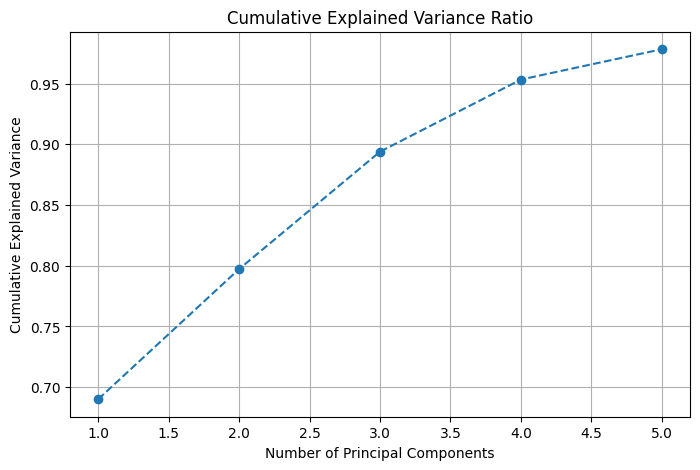

In [111]:
# 绘制累计方差贡献率图
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

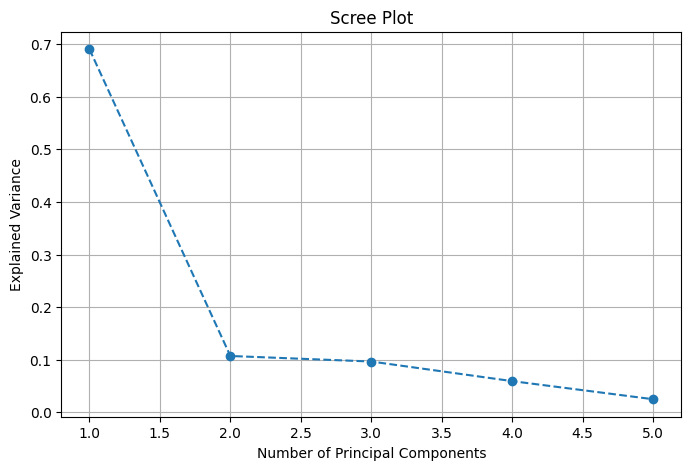

In [112]:
# 碎石图
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

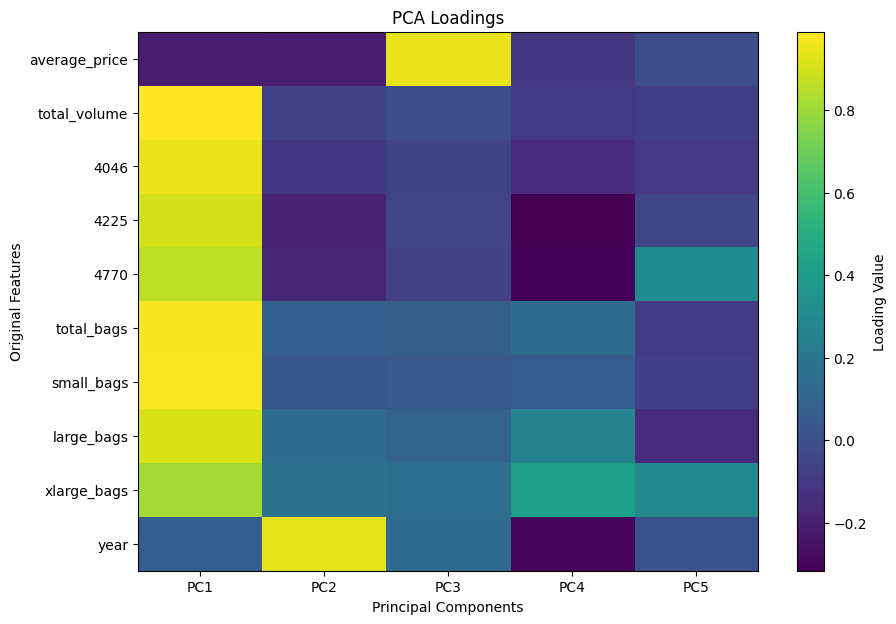

In [113]:
# 载荷图
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(10, 7))
plt.imshow(loadings, cmap='viridis', aspect='auto')
plt.colorbar(label='Loading Value')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.xticks(range(loadings.shape[1]), [f'PC{i+1}' for i in range(loadings.shape[1])])
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()